In [1]:
from qtn_sim import *

Will explore the evolution of entropy and sparisty over the application
of a circuit.

In [2]:
n = 5

bond_dimension = 2

MPS = QuantumMPS(n, bond_dimension)

circuit = QFTCircuit(n)

In [3]:
# If we prepare circuit with swapping:

def prepareWithSwapping(circuit):
    out = QCircuit()
    for (gate, indices) in circuit.gateList:
        nonadjacent =  np.max([0]+[indices[i] -indices[i-1] for i in range(len(indices))]) > 1
        swaps = []
        if nonadjacent:
            q = indices[0]
            for i in range(1,len(indices)):
                # print(q)
                if indices[i] - q > 1:
                    for j in range(indices[i] - q-1):
                        out.addGate(swapGate, [indices[i]-j-1,indices[i]-j])
                        swaps.append([indices[i]-j-1,indices[i]-j])
                q += 1
        out.addGate(gate,[i + indices[0] for i in range(len(indices))])
        swaps.reverse()
        if nonadjacent and len(swaps) > 0:
            for i in swaps:
                out.addGate(swapGate,i)
    return out

# circuit = prepareWithSwapping(circuit)

In [17]:
def getMPSEntropy(mps):
    total_entropy = 0
    for bond in range(len(mps) - 1):
        # tensor = np.einsum('ijk,lmn->ijmn', mps[bond], mps[bond+1])
        tensor = mps[bond]

        shape = tensor.shape
        matrix = tensor.reshape(shape[0]*shape[1], -1)
        
        _, S, _ = np.linalg.svd(matrix, full_matrices=False)
        
        probabilities = S**2
        probabilities /= np.sum(probabilities)
        
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-12))
        
        total_entropy += entropy
    return total_entropy

In [18]:

bond_dimension = 2
MPS = QuantumMPS(n,bond_dimension)
# MPS.applyCircuit(GHZCircuit(n))
v = []
v.append(getMPSEntropy(MPS.tensors)) 
for (gate, indices) in circuit.gateList:
    MPS.apply(gate, indices)
    v.append(getMPSEntropy(MPS.tensors))    



In [19]:
bond_dimension = 4
MPS = QuantumMPS(n,bond_dimension)
v1 = []
v1.append(getMPSEntropy(MPS.tensors)) 
for (gate, indices) in circuit.gateList:
    MPS.apply(gate, indices)
    v1.append(getMPSEntropy(MPS.tensors))    

bond_dimension = 6
MPS = QuantumMPS(n,bond_dimension)
v2 = []
v2.append(getMPSEntropy(MPS.tensors)) 
for (gate, indices) in circuit.gateList:
    MPS.apply(gate, indices)
    v2.append(getMPSEntropy(MPS.tensors))    

bond_dimension = 8
MPS = QuantumMPS(n,bond_dimension)
v3 = []
v3.append(getMPSEntropy(MPS.tensors)) 
for (gate, indices) in circuit.gateList:
    MPS.apply(gate, indices)
    v3.append(getMPSEntropy(MPS.tensors))    


C:\Users\aadik\AppData\Local\Temp\ipykernel_22784\2770621834.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


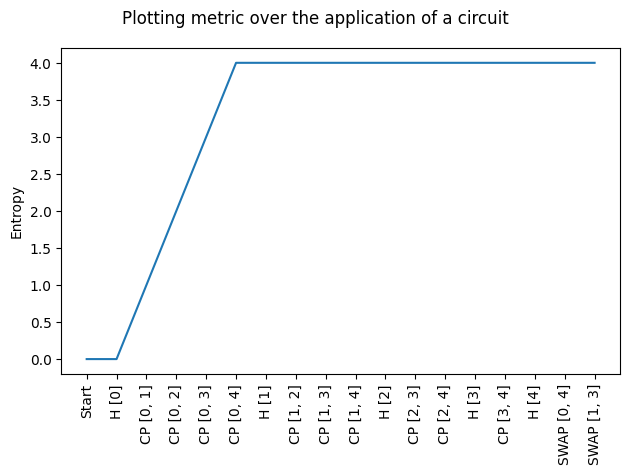

In [20]:
import matplotlib.pyplot as plt

xl = ["Start"] + [g.id + " " + str(i) for (g,i) in circuit.gateList]
fig = plt.figure()
fig.suptitle("Plotting metric over the application of a circuit")
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("Entropy")
ax.plot(list(range(len(xl))), v)
# ax.plot(list(range(len(xl))), v1)
# ax.plot(list(range(len(xl))), v2)
# ax.plot(list(range(len(xl))), v3)
# ax.legend(labels=["2", "4", "6", "8"])
ax.set_xticks(range(len(xl)))
ax.set_xticklabels(xl, rotation=90)
fig.tight_layout()
fig.show()